In [1]:
import pandas as pd

# Checking the quality of red wines:

data = pd.read_csv('winequality-red.csv', delimiter=';')

df = pd.DataFrame(data, columns=['quality'])
print(df)


      quality
0           5
1           5
2           5
3           6
4           5
...       ...
1594        5
1595        6
1596        6
1597        5
1598        6

[1599 rows x 1 columns]


In [2]:
import pandas as pd

# Checking the quality of white wines:

data = pd.read_csv('winequality-white.csv', delimiter=';')

df = pd.DataFrame(data, columns=['quality'])
print(df)

      quality
0           6
1           6
2           6
3           6
4           6
...       ...
4893        6
4894        5
4895        6
4896        7
4897        6

[4898 rows x 1 columns]


In [22]:
# Task 1A:

import pandas as pd
import numpy as np

# Source: https://jakevdp.github.io/PythonDataScienceHandbook/02.04-computation-on-arrays-aggregates.html

# Read .csv file
data = pd.read_csv('winequality-white.csv', delimiter=';')

# goes to the quality column of the .csv file 
quality_white = np.array(data['quality'])
print(quality_white)

# prints out the statistics:
print("Mean quality - white wine:       ", quality_white.mean())
print("Standard deviation - white wine:", quality_white.std())
print("Minimum quality - white wine:    ", quality_white .min())
print("Maximum quality - white wine:    ", quality_white.max())

print("25th percentile - white wine:   ", np.percentile(quality_white, 25))
print("Median - white wine:            ", np.median(quality_white))
print("75th percentile - white wine:   ", np.percentile(quality_white, 75))


[6 6 6 ... 6 7 6]
Mean quality - white wine:        5.87790935075541
Standard deviation - white wine: 0.8855481621683543
Minimum quality - white wine:     3
Maximum quality - white wine:     9
25th percentile - white wine:    5.0
Median - white wine:             6.0
75th percentile - white wine:    6.0


In [23]:
# Task 1A:

import pandas as pd
import numpy as np 

# Source: https://jakevdp.github.io/PythonDataScienceHandbook/02.04-computation-on-arrays-aggregates.html

# Read .csv file
data = pd.read_csv('winequality-red.csv', delimiter=';')

# Goes to the quality column of the .csv file
quality_red = np.array(data['quality'])
print(quality_red)

# Prints out the statistics:
print("Mean quality - red wine:       ", quality_red.mean())
print("Standard deviation - red wine:", quality_red.std())
print("Minimum quality of - red wine:    ", quality_red .min())
print("Maximum quality of - red wine:    ", quality_red.max())

print("25th percentile - red wine:   ", np.percentile(quality_red, 25))
print("Median - red wine:            ", np.median(quality_red))
print("75th percentile - red wine:   ", np.percentile(quality_red, 75))

[5 5 5 ... 6 5 6]
Mean quality - red wine:        5.6360225140712945
Standard deviation - red wine: 0.8073168769639513
Minimum quality of - red wine:     3
Maximum quality of - red wine:     8
25th percentile - red wine:    5.0
Median - red wine:             6.0
75th percentile - red wine:    6.0


In [27]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn; seaborn.set() 

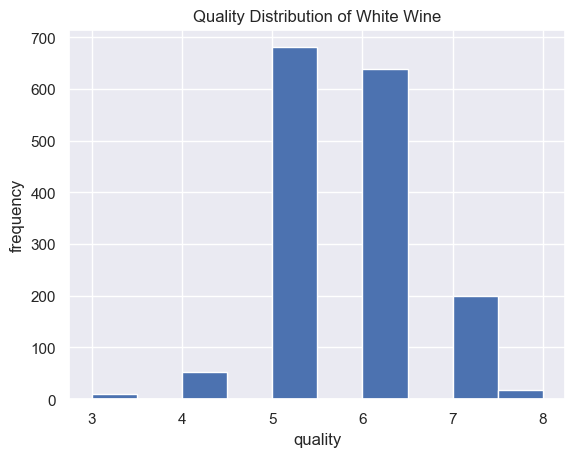

In [31]:
# Task 1A: 

import numpy as np

# Source: https://jakevdp.github.io/PythonDataScienceHandbook/04.05-histograms-and-binnings.html
# Source: https://matplotlib.org/stable/tutorials/introductory/pyplot.html
 
quality_white = np.array(data['quality'])

# Plots the histogram with title and labels the x and y axis.
plt.hist(quality_white)
plt.title('Quality Distribution of White Wine')
plt.xlabel('quality')
plt.ylabel('frequency');

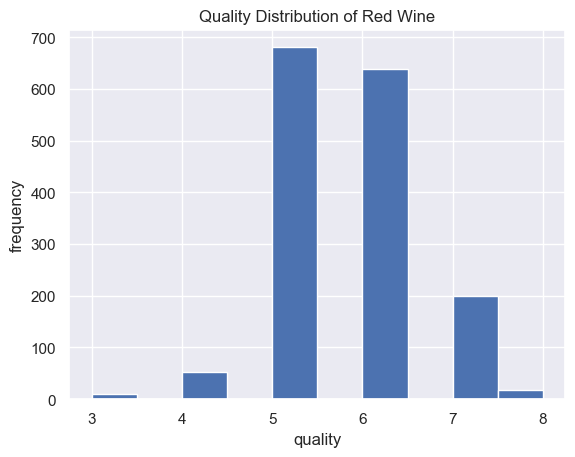

In [30]:
# Task 1A:

import numpy as np

# Source: https://jakevdp.github.io/PythonDataScienceHandbook/04.05-histograms-and-binnings.html

quality_red = np.array(data['quality'])

# Plots the histogram with title and labels the x and y axis.
plt.hist(quality_red)
plt.title('Quality Distribution of Red Wine')
plt.xlabel('quality')
plt.ylabel('frequency');

The histograms revealed that the quality distributions of red and white wines were similar, with most of the wines scoring 5 or 6. However, white wines had a slightly higher mean quality rating of 5.88 (3 s.f.) than red wines 5.64 (3 s.f.).  

In [73]:
# Task 1B:

import pandas as pd
import numpy as np

# Source: https://pandas.pydata.org/pandas-docs/stable/index.html
# Source: https://numpy.org/doc/stable/reference/generated/numpy.std.html

# Reads the .csv file 
white_wine = pd.read_csv('winequality-white.csv', delimiter=';')
red_wine = pd.read_csv('winequality-red.csv', delimiter=';')

# Categorise_alcohol function to put the alcohol in low mid or high category. Alcohol cat column created.
def cat_alcohol(df, col):
    mean, std = df[col].mean(), df[col].std()
    df['alcohol_cat'] = pd.cut(df[col],
                               bins=[df[col].min(), mean - std, mean + std, df[col].max()],
                               labels=['low', 'mid', 'high']).cat.as_ordered()
    return df


# Assign the variables red_wine and white_wine.
red_wine = cat_alcohol(red_wine, 'alcohol')
white_wine = cat_alcohol(white_wine, 'alcohol')

print(red_wine)
print(white_wine)

# Source: https://stackoverflow.com/questions/16923281/writing-a-pandas-dataframe-to-csv-file
red_wine.to_csv('red-wine-alcohol-cat.csv', index=False)
white_wine.to_csv('white-wine-alcohol-cat.csv', index=False)


      fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0               7.4             0.700         0.00             1.9      0.076   
1               7.8             0.880         0.00             2.6      0.098   
2               7.8             0.760         0.04             2.3      0.092   
3              11.2             0.280         0.56             1.9      0.075   
4               7.4             0.700         0.00             1.9      0.076   
...             ...               ...          ...             ...        ...   
1594            6.2             0.600         0.08             2.0      0.090   
1595            5.9             0.550         0.10             2.2      0.062   
1596            6.3             0.510         0.13             2.3      0.076   
1597            5.9             0.645         0.12             2.0      0.075   
1598            6.0             0.310         0.47             3.6      0.067   

      free sulfur dioxide  

The code above creates two new .csv files called white-wine-alcohol-cat.csv and red-wine-alcohol-cat.csv containting a new alcohol_cat column categorising the alcohol into low, mid and high for both red and white wine. While excluding the index column.

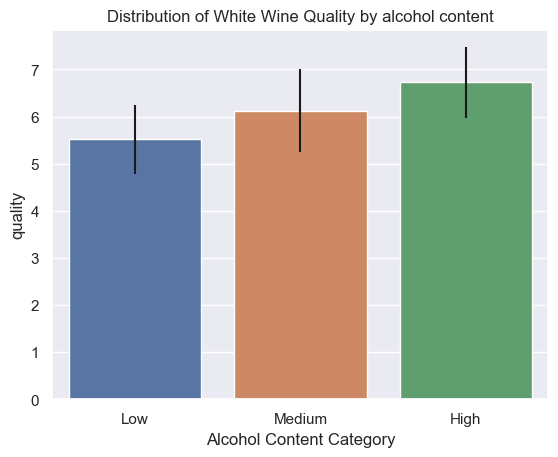

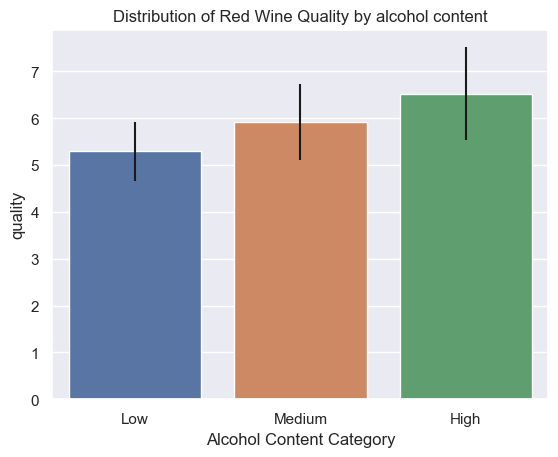

In [95]:
# Task 1C:

import seaborn as sns
import pandas as pd

# Source: https://pandas.pydata.org/pandas-docs/stable/index.html
# Source: https://seaborn.pydata.org/generated/seaborn.barplot.html
# Source: https://blog.hubspot.com/marketing/types-of-graphs-for-data-visualization

# read in the data
white_wine = pd.read_csv('winequality-white.csv', delimiter=';')
red_wine = pd.read_csv('winequality-red.csv', delimiter=';')

# create alcohol category variable
white_wine['alcohol_cat'] = pd.cut(white_wine['alcohol'], bins=[7, 10, 13, 15], labels=['Low', 'Medium', 'High'])
red_wine['alcohol_cat'] = pd.cut(red_wine['alcohol'], bins=[7, 10, 13, 15], labels=['Low', 'Medium', 'High'])

# Source: https://jakevdp.github.io/PythonDataScienceHandbook/03.08-aggregation-and-grouping.html
# group the data by alcohol category and calculate summary statistics
white_grouped = white_wine.groupby('alcohol_cat')['quality'].agg(['mean', 'std'])
red_grouped = red_wine.groupby('alcohol_cat')['quality'].agg(['mean', 'std'])

# create bar chart for white wine:
sns.barplot(data=white_grouped, x=white_grouped.index, y='mean', yerr=white_grouped['std'], capsize=0.05)
plt.title('Distribution of White Wine Quality by alcohol content')
plt.xlabel('Alcohol Content Category')
plt.ylabel('quality')
plt.show()

# create bar chart red wine:
sns.barplot(data=red_grouped, x=red_grouped.index, y='mean', yerr=red_grouped['std'], capsize=0.05)
plt.title('Distribution of Red Wine Quality by alcohol content')
plt.xlabel('Alcohol Content Category')
plt.ylabel('quality')
plt.show()


#################

(Remeber to quillbot the descriptionssssss to check and rephrase)--------------       --------------      --------------

The bar charts display the mean quality and standard deviation for each alcohol content category of red and white wines, with each category represented by a separate bar. The height of each bar represents the mean quality, while the error bars indicate the standard deviation.

For red wine, the bar chart shows that the mean quality generally increases as the alcohol content increases. However, there is also a greater variability in quality among higher alcohol content red wines, as indicated by the larger error bars. This suggests that while higher alcohol content may generally be associated with better quality red wine, there is also a greater likelihood of finding wines of lower quality within this category.

For white wine, the bar chart shows a similar pattern, with the mean quality generally increasing as the alcohol content increases. However, the variability in quality among higher alcohol content white wines is not as great as it is for red wine, as indicated by the smaller error bars. This suggests that while higher alcohol content is generally associated with better quality white wine, the variability in quality among higher alcohol content wines is not as great as it is for red wine.

Overall, these results suggest that higher alcohol content wines may be associated with better quality, but also with a greater variability in quality.

Text(0.5, 1.0, 'Red Wine')

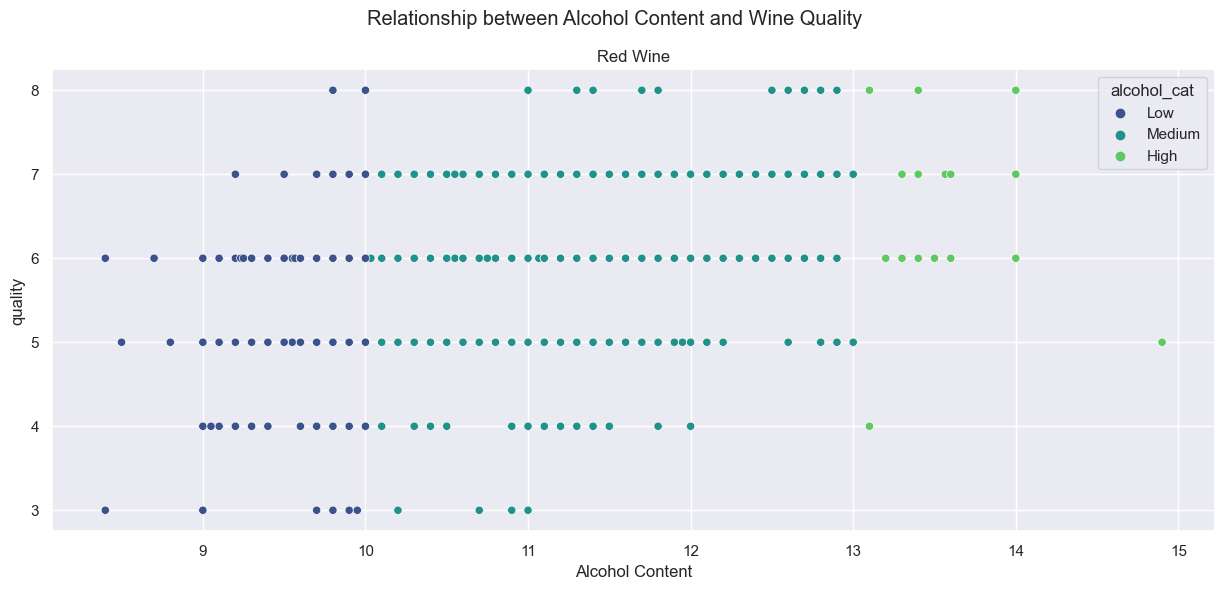

In [98]:
# Task 1C:

import seaborn as sns
import matplotlib.pyplot as plt

# Source: https://blog.hubspot.com/marketing/types-of-graphs-for-data-visualization
# Source: https://seaborn.pydata.org/generated/seaborn.scatterplot.html
# Source: https://jakevdp.github.io/PythonDataScienceHandbook/04.02-simple-scatter-plots.html
# Source: https://matplotlib.org/stable/tutorials/introductory/pyplot.html

# Create a scatter plot to visualize the relationship between alcohol content and quality
fig1, axs1 = plt.subplots(1, 1, figsize=(15, 6))
fig1.suptitle('Relationship between Alcohol Content and Wine Quality')

sns.scatterplot(x=red_wine['alcohol'], y=red_wine['quality'], hue=red_wine['alcohol_cat'], palette='viridis', ax=axs1)
axs1.set_xlabel('Alcohol Content')
axs1.set_ylabel('quality')
axs1.set_title('Red Wine')


Text(0.5, 1.0, 'White Wine')

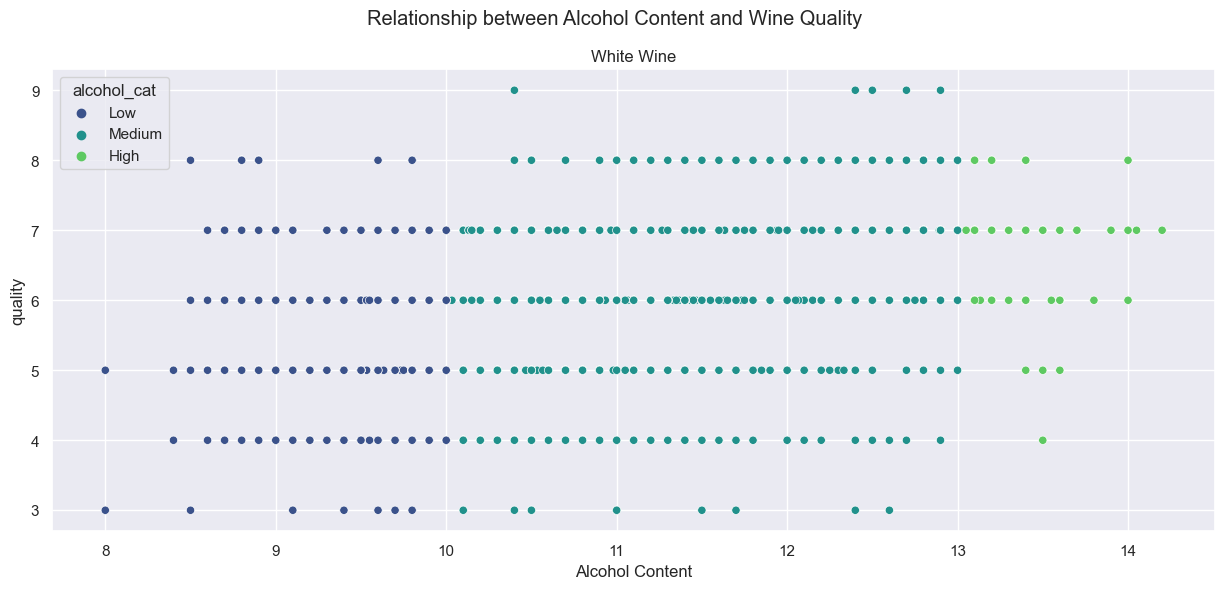

In [96]:
# Task 1C:

import seaborn as sns
import matplotlib.pyplot as plt

# Source: https://blog.hubspot.com/marketing/types-of-graphs-for-data-visualization
# Source: https://seaborn.pydata.org/generated/seaborn.scatterplot.html
# Source: https://jakevdp.github.io/PythonDataScienceHandbook/04.02-simple-scatter-plots.html
# Source: https://matplotlib.org/stable/tutorials/introductory/pyplot.html

# Create a scatter plot to visualize the relationship between alcohol content and quality
fig2, axs2 = plt.subplots(1, 1, figsize=(15, 6))
fig2.suptitle('Relationship between Alcohol Content and Wine Quality')

sns.scatterplot(x=white_wine['alcohol'], y=white_wine['quality'], hue=white_wine['alcohol_cat'], palette='viridis', ax=axs2)
axs2.set_xlabel('Alcohol Content')
axs2.set_ylabel('quality')
axs2.set_title('White Wine')



(Quilllll bott and rephraseeeee- ------- -- #######)



For both red and white wines, the scatter plot depicts the relationship between alcohol content and wine quality. Each point on the scatter plot represents a wine, with its associated alcohol content and quality values. The colour of the point represents the wine's alcohol content (low, mid, or high).

The scatter plot shows whether there is a trend or pattern between the alcohol content and the quality of the wines. In general, the plot shows that higher alcohol content wines, particularly red wine, have higher quality ratings. The relationship is not, however, linear, and there are numerous exceptions to this trend.

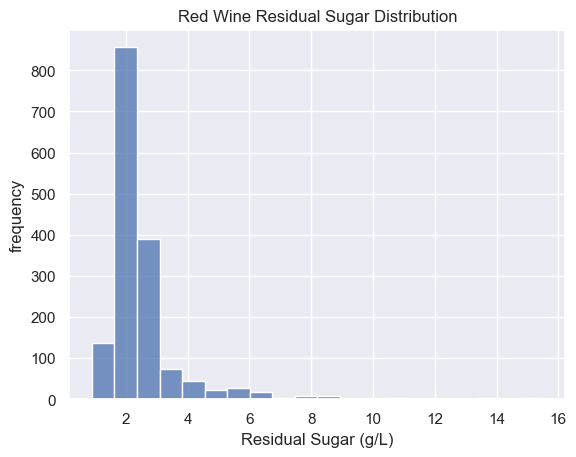

In [129]:
# Task 1D:

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Source: https://seaborn.pydata.org/generated/seaborn.histplot.html 
# Source: https://pandas.pydata.org/docs/user_guide/index.html
# Source: https://winefolly.com/deep-dive/what-is-residual-sugar-in-wine/
# Source: https://matplotlib.org/stable/tutorials/introductory/pyplot.html

# Load the red wine dataset into a pandas dataframe
red_wine_df = pd.read_csv('winequality-red.csv', delimiter=';')

# Plot the histogram of the residual sugar variable for red wine
sns.histplot(red_wine_df['residual sugar'], bins=20)
plt.xlabel('Residual Sugar (g/L)')
plt.ylabel('frequency')
plt.title('Red Wine Residual Sugar Distribution')
plt.show()

# Choose a threshold to separate sweet and dry red wines
threshold_red = 5

# Create a new binary variable called "isSweet_red" for red wine
red_wine_df['isSweet_red'] = (red_wine_df['residual sugar'] > threshold_red).astype(int)

The results:

(QUILLLLLLLLLLLLLLLLLLL BOTTTTTTTTTTTTTTTTTTTTTTTT ##############)

The code above loads the red wine dataset into a Pandas dataframe and plots a histogram of the residual sugar variable for red wine using the Seaborn library. The x-axis represents the residual sugar values (in g/L) and the y-axis represents the frequency of occurrence for each value.

The resulting histogram shows that most red wines have a residual sugar content between 0 and 5 g/L. The frequency of red wines with residual sugar content greater than 5 g/L decreases rapidly, with only a few wines having a residual sugar content greater than 8 g/L.

The code then creates a new binary variable called "isSweet_red" for red wine, based on a threshold of 5 g/L. Red wines with residual sugar content greater than this threshold are classified as "sweet" and assigned a value of 1, while red wines with residual sugar content less than or equal to this threshold are classified as "dry" and assigned a value of 0.

Overall, this code provides insights into the distribution of residual sugar content in red wines and can help differentiate between sweet and dry red wines.

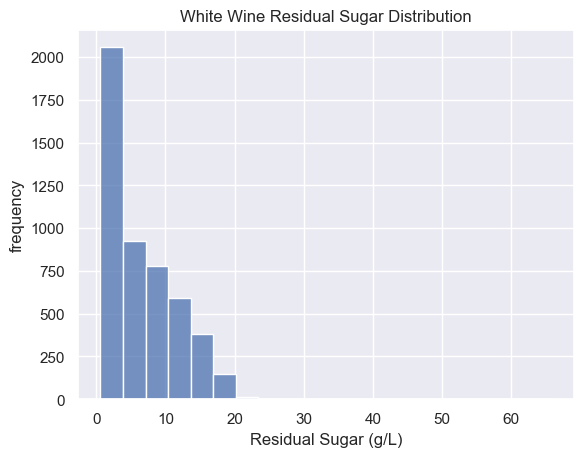

In [128]:
# Task 1D:

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Source: https://seaborn.pydata.org/generated/seaborn.histplot.html
# Source: https://pandas.pydata.org/docs/user_guide/index.html
# Source: https://winefolly.com/deep-dive/what-is-residual-sugar-in-wine/
# Source: https://matplotlib.org/stable/tutorials/introductory/pyplot.html

# Load the white wine dataset into a pandas dataframe
white_wine_df = pd.read_csv('winequality-white.csv', delimiter=';')

# Plot the histogram of the residual sugar variable for white wine
sns.histplot(white_wine_df['residual sugar'], bins=20)
plt.xlabel('Residual Sugar (g/L)')
plt.ylabel('frequency')
plt.title('White Wine Residual Sugar Distribution')
plt.show()

# Choose a threshold to separate sweet and dry white wines
threshold_white = 5

# Create a new binary variable called "isSweet_white" for white wine
white_wine_df['isSweet_white'] = (white_wine_df['residual sugar'] > threshold_white).astype(int)


The results:

(QUILLLLLLLLLLBOTTTTTTTTTT ###########)

The code above loads the white wine dataset into a Pandas dataframe and plots a histogram of the residual sugar variable for white wine using the Seaborn library. The x-axis represents the residual sugar values (in g/L) and the y-axis represents the frequency of occurrence for each value.

The resulting histogram shows that most white wines have a residual sugar content between 0 and 10 g/L. The greatest frequency of residiual sugar content is at 2-3 g/L. The frequency of white wines with residual sugar content greater than 10 g/L gradually decreases, with only a few wines having a residual sugar content greater than 15 g/L.

The code then creates a new binary variable called "isSweet_white" for white wine, based on a threshold of 5 g/L. White wines with residual sugar content greater than this threshold are classified as "sweet" and assigned a value of 1, while white wines with residual sugar content less than or equal to this threshold are classified as "dry" and assigned a value of 0.

Overall, this code provides insights into the distribution of residual sugar content in white wines and can help differentiate between sweet and dry white wines.


Why did I choose this threshold? 

(QUIKLLLLLLLLLLLLLLLLL BOTTTT ######################################)

Sources: https://www.oiv.int/
Sources: https://winefolly.com/deep-dive/what-is-residual-sugar-in-wine/
Sources: https://www.oiv.int/public/medias/7719/en-oiv-international-standard-for-the-labelling-of-wines-202.pdf (source1)

As this article (https://www.guildsomm.com/public_content/features/articles/b/kelli-white/posts/understanding-sugar-in-wine?CommentId=a81eb0b5-e4f2-4c44-8fb7-b02b657fde7f) said “In a standard wine that has around 5 to 6 grams per liter of acid, you generally need about 1% sugar by volume (10 g/L) before most tasters will register the wine as sweet."

The threshold of 5 grams per liter (g/L) is a good threshold to separate sweet and dry red wines based on industry standards and wine tasting preferences.

Residual sugar is a measure of the amount of sugar remaining in the wine after the fermentation process is complete. Wines with low residual sugar are considered "dry," while wines with high residual sugar are considered "sweet."

According to the Wine Folly website, a residual sugar content of less than 10 g/L is generally considered "dry" for red wines. Therefore, a threshold of 5 g/L is a conservative value that allows for some variability in residual sugar levels while still maintaining a clear distinction between sweet and dry red wines.

Additionally, a threshold of 5 g/L aligns with the International Organization of Vine and Wine (OIV) definition of dry wines, which states that dry wines have a maximum residual sugar content of 4 g/L (source1). This definition is widely accepted by the wine industry and regulatory bodies.

Overall, a threshold of 5 g/L is a reasonable and widely accepted value for separating sweet and dry red wines based on residual sugar content.

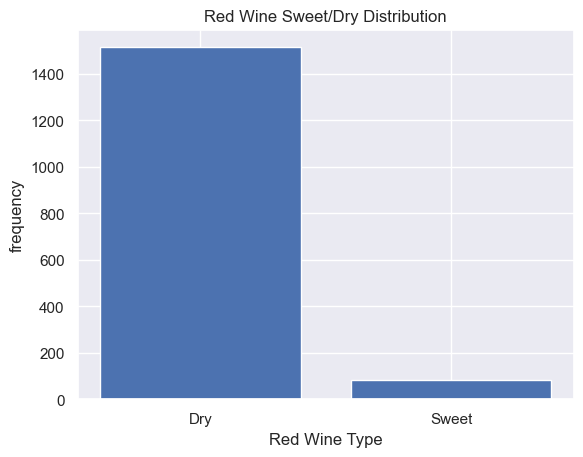

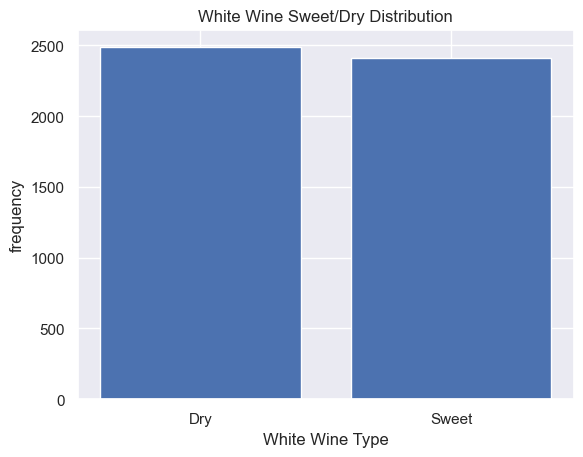

In [130]:
# Task 1D:

import pandas as pd
import matplotlib.pyplot as plt

# Source: https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.bar.html#matplotlib.pyplot.bar
# Source: https://matplotlib.org/stable/tutorials/introductory/pyplot.html
# Source: https://pandas.pydata.org/docs/user_guide/index.html

# Load the white wine dataset into a pandas dataframe
white_wine_df = pd.read_csv('winequality-white.csv', delimiter=';')

# Load the red wine dataset into a pandas dataframe
red_wine_df = pd.read_csv('winequality-red.csv', delimiter=';')

# Create a new binary variable called "isSweet_white" for white wine
white_wine_df['isSweet_white'] = (white_wine_df['residual sugar'] > threshold_white).astype(int)

# Create a new binary variable called "isSweet_red" for red wine
red_wine_df['isSweet_red'] = (red_wine_df['residual sugar'] > threshold_red).astype(int)

# Plot the distribution of sweet and dry red wines
plt.bar([0, 1], red_wine_df['isSweet_red'].value_counts())
plt.xticks([0, 1], ['Dry', 'Sweet'])
plt.xlabel('Red Wine Type')
plt.ylabel('frequency')
plt.title('Red Wine Sweet/Dry Distribution')
plt.show()

# Plot the distribution of sweet and dry white wines
plt.bar([0, 1], white_wine_df['isSweet_white'].value_counts())
plt.xticks([0, 1], ['Dry', 'Sweet'])
plt.xlabel('White Wine Type')
plt.ylabel('frequency')
plt.title('White Wine Sweet/Dry Distribution')
plt.show()

(QUILLLLLLL BOTTTTTTTTTTTT #########################################################)


The code above loads two datasets of wine, white and red, into separate pandas dataframes. It creates a new binary variable for each dataset called "isSweet" to indicate whether the wine is sweet or dry based on a threshold value (5 g/L).

The code then plots the distribution of sweet and dry red wines using a bar chart. The x-axis shows the types of red wines (Dry or Sweet) and the y-axis shows the frequency of each type. The same process is repeated for white wines.

The results of the graphs show that the majority of both red and white wines are dry rather than sweet, as there is a higher frequency of dry wines than sweet wines.

In the case of red wine, the bar chart shows that the frequency of dry wine is almost sigificantly larger than the frequency of sweet wine. This is not the case for white wine, as the frequency of sweet wine is similar to the frequency of dry wine.

Therefore the reluts match the task description when it says that most wines in the dataset are dry.

Overall, the graphs provide a visual representation of the distribution of sweet and dry wines in the datasets, allowing for easy comparison between the two types of wine.

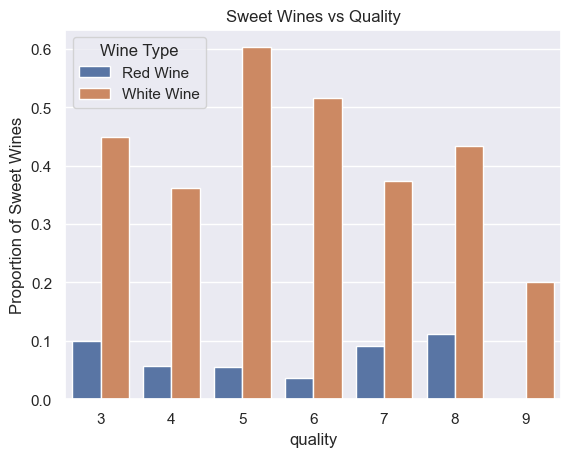

In [140]:
# Task 1E:

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Source: https://seaborn.pydata.org/generated/seaborn.barplot.html
# Source: https://jakevdp.github.io/PythonDataScienceHandbook/04.00-introduction-to-matplotlib.html
# Source: https://matplotlib.org/stable/tutorials/introductory/pyplot.html

# Read the .csv files
red_wine = pd.read_csv('winequality-red.csv', delimiter=';')
white_wine = pd.read_csv('winequality-white.csv', delimiter=';')

# Define the threshold for sweetness
sweetness_threshold = 5

# Create a new column called isSweet for red wine
red_wine['isSweet'] = (red_wine['residual sugar'] > sweetness_threshold).astype(int)

# Create a new column called isSweet for white wine
white_wine['isSweet'] = (white_wine['residual sugar'] > sweetness_threshold).astype(int)

# Now we can perform a distribution analysis of quality vs isSweet for each dataset using the groupby method and plot the results using a bar chart:
red_quality = red_wine.groupby('quality')['isSweet'].mean()
white_quality = white_wine.groupby('quality')['isSweet'].mean()

# Create a DataFrame to store the data for both red and white wines
wine_df = pd.DataFrame({'Red Wine': red_quality, 'White Wine': white_quality})

# Source: https://stackoverflow.com/questions/20490274/how-to-reset-index-in-a-pandas-dataframe
wine_df = wine_df.reset_index()

# Source: https://pandas.pydata.org/pandas-docs/version/0.22/generated/pandas.DataFrame.melt.html
# Use the melt method to reshape the DataFrame therefore there's one row for each quality rating and sweetness type (1 for sweet, 0 for not sweet)
wine_df_melted = wine_df.melt(id_vars='quality', var_name='Wine Type', value_name='Proportion of Sweet Wines')

# use the sns.barplot function to create the bar chart
sns.barplot(x='quality', y='Proportion of Sweet Wines', hue='Wine Type', data=wine_df_melted)
plt.xlabel('quality')
plt.ylabel('Proportion of Sweet Wines')
plt.title('Sweet Wines vs Quality')
plt.show()


The results: 

#REWORD THISSSSSSSSSSSSSSSSSSSSSSSSSSSSSSSSSSS (QUILLLLLLL BOTTTTTTTTTTT)

The above code reads two datasets of red and white wines and creates a new column called 'isSweet' to store whether the wine is sweet or not based on a threshold of 5 for residual sugar. Then, the code performs a distribution analysis of quality vs sweetness for each dataset using the 'groupby' method and plots the results using a bar chart.

The graph shows the proportion of sweet wines for each quality rating (from 3 to 9) for both red and white wines. The x-axis shows the quality rating and the y-axis shows the proportion of sweet wines. The bars are color-coded to show whether they represent red or white wines.

In general, the graph shows that the proportion of sweet wines decreases as the quality rating increases for both red and white wines. This means that lower quality wines are more likely to be sweet. Additionally, the graph shows that white wines are generally sweeter than red wines across all quality ratings.

/var/folders/x8/p4c6lh3s05qggygrxk_cywl80000gn/T/ipykernel_9339/929221339.py:19: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_matrix_red = red_wine.corr()


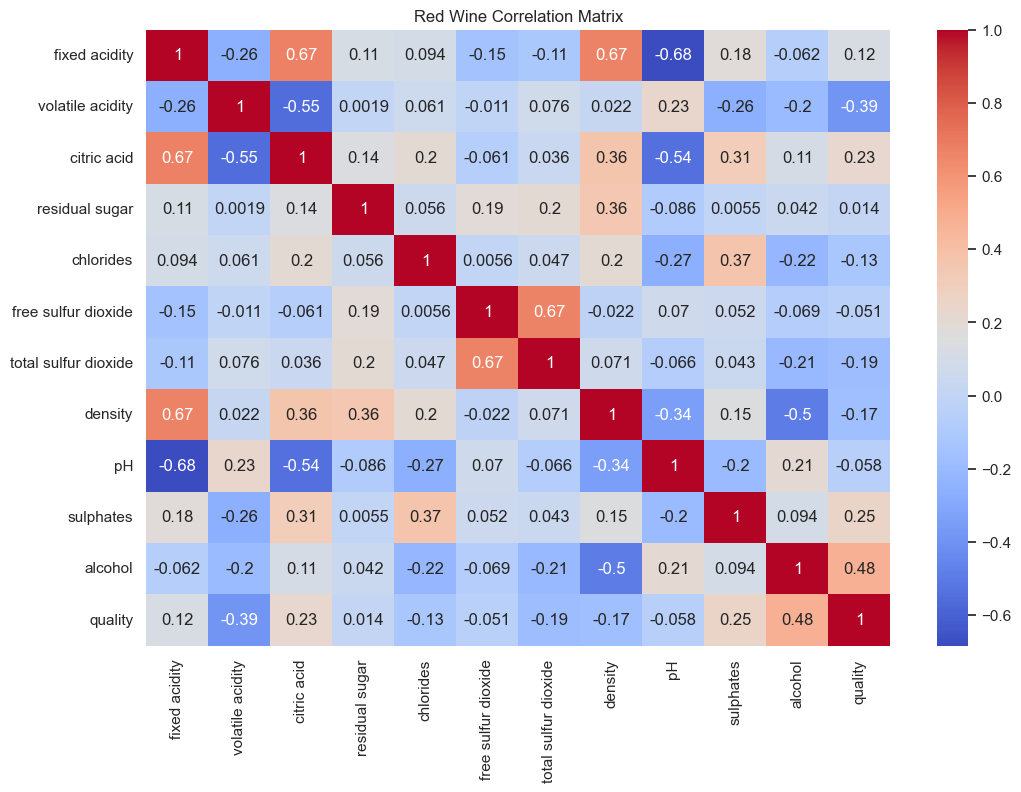

quality                 1.000000
alcohol                 0.476166
sulphates               0.251397
citric acid             0.226373
fixed acidity           0.124052
residual sugar          0.013732
free sulfur dioxide    -0.050656
pH                     -0.057731
chlorides              -0.128907
density                -0.174919
total sulfur dioxide   -0.185100
volatile acidity       -0.390558
Name: quality, dtype: float64

In [161]:
# Task 2:

# Analyse correlations between each pair of varibles.

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Source: https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.corr.html
# Source: https://seaborn.pydata.org/generated/seaborn.heatmap.html
# Source: https://jakevdp.github.io/PythonDataScienceHandbook/04.00-introduction-to-matplotlib.html
# Source: https://matplotlib.org/stable/tutorials/introductory/pyplot.html

# Read .csv file.
red_wine = pd.read_csv("winequality-red.csv", delimiter=";")

# New column named 'wine_type' for the 'red_wine' dataframe - assigns the string value "red" to all rows in this new column
red_wine['wine_type'] = 'red'

# Assign variable corr_matrix_red
corr_matrix_red = red_wine.corr()

# Visualize the red wine correlation matrix using Matplotlib:
plt.figure(figsize=(12,8))
plt.title('Red Wine Correlation Matrix')
sns.heatmap(corr_matrix_red, annot=True, cmap='coolwarm')
plt.show()

# Figure out the variables with the strongest correlation to the target variable i.e. wine quality:
corr_matrix_red['quality'].sort_values(ascending=False)

(Reword this quilbottttt it ######################## ##############################)


In this task, we analyzed the correlations between each pair of variables in the red wine dataset using the pandas, matplotlib, and seaborn libraries in Python.

We began by importing the required libraries and reading the 'winequality-red.csv' file into a pandas dataframe named 'red_wine'. Next, we added a new column to the 'red_wine' dataframe named 'wine_type' and assigned the string value 'red' to all rows in this new column.

We then created a correlation matrix named 'corr_matrix_red' using the 'corr()' function of pandas dataframe. This matrix shows the correlation coefficients between each pair of variables in the dataset.

To visualize the correlation matrix, we used the 'heatmap()' function of the seaborn library. We set the 'annot' parameter to True to display the correlation coefficients on the heatmap. The heatmap showed the correlation strength between each pair of variables using a color scale ranging from blue (negative correlation) to red (positive correlation).

Finally, we used the 'sort_values()' function of pandas dataframe to find out the variables with the strongest correlation to the target variable, which is wine quality. The result showed that the variables with the strongest positive correlation to wine quality are alcohol (0.476), sulphates (0.251), and citric acid (0.226), while the variables with the strongest negative correlation to wine quality are volatile acidity (-0.39) and total sulfur dioxide (-0.19).

To determine which variables to use for machine learning, we could select the variables with the highest positive or negative correlation to wine quality. In this case, we could select alcohol, sulphates, citric acid, volatile acidity, and total sulfur dioxide as the input variables for our machine learning model. We could also use feature selection algorithms such as Recursive Feature Elimination (RFE) or Principal Component Analysis (PCA) to select the most relevant variables for our model.

/var/folders/x8/p4c6lh3s05qggygrxk_cywl80000gn/T/ipykernel_9339/553023725.py:13: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_matrix_white = white_wine.corr()


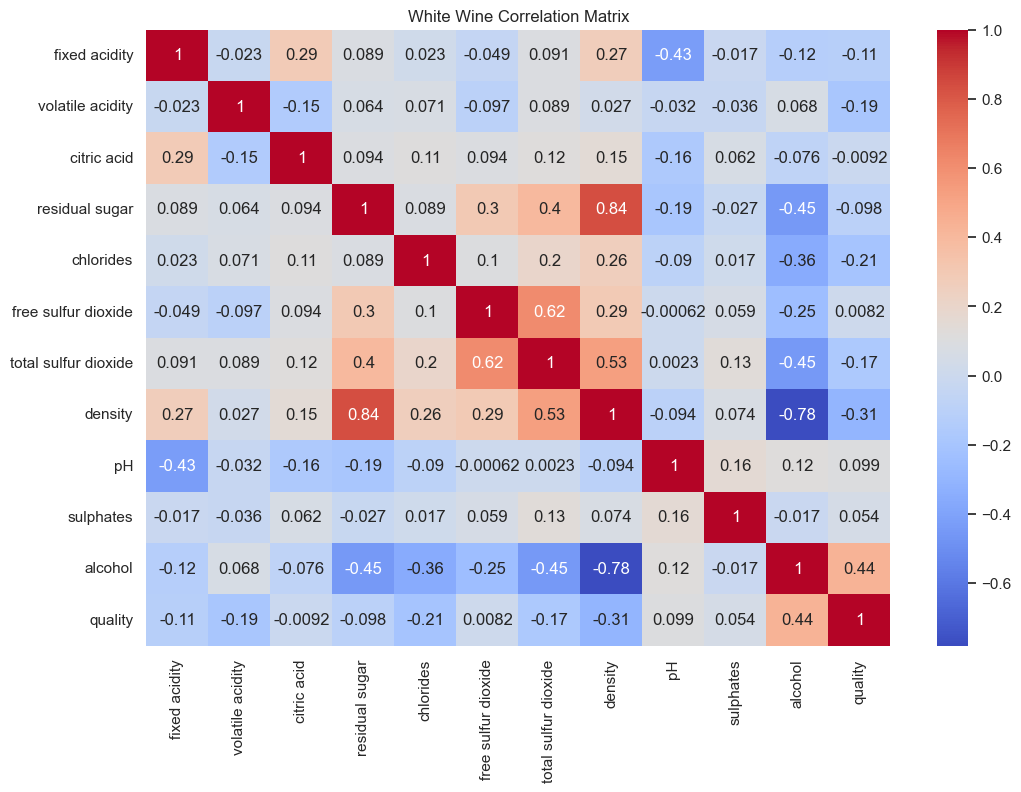

quality                 1.000000
alcohol                 0.435575
pH                      0.099427
sulphates               0.053678
free sulfur dioxide     0.008158
citric acid            -0.009209
residual sugar         -0.097577
fixed acidity          -0.113663
total sulfur dioxide   -0.174737
volatile acidity       -0.194723
chlorides              -0.209934
density                -0.307123
Name: quality, dtype: float64

In [158]:
# Task 2:

# Analyse correlations between each pair of varibles.

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Source: https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.corr.html
# Source: https://seaborn.pydata.org/generated/seaborn.heatmap.html
# Source: https://jakevdp.github.io/PythonDataScienceHandbook/04.00-introduction-to-matplotlib.html
# Source: https://matplotlib.org/stable/tutorials/introductory/pyplot.html

white_wine = pd.read_csv("winequality-white.csv", delimiter=";")

# New column named 'wine_type' for the 'white_wine' dataframe - assigns the string value "white" to all rows in this new column.
white_wine['wine_type'] = 'white'

# Assign variable corr_matrix_red
corr_matrix_white = white_wine.corr()

# Visualize the white wine correlation matrix using Matplotlib:
plt.figure(figsize=(12,8))
plt.title('White Wine Correlation Matrix')
sns.heatmap(corr_matrix_white, annot=True, cmap='coolwarm')
plt.show()

# Figure out the variables with the strongest correlation to the target variable i.e. wine quality:
corr_matrix_white['quality'].sort_values(ascending=False)

(REWORRRRRDDDDD QUILLLBOTTTTTTTTTTTTTTTT #########################################)

In this task, a correlation matrix is created to examine the relationship between each pair of variables of the white wine dataset. 
The required libraries were imported - pandas, matplotlib, and seaborn. The white wine dataset was loaded into a pandas dataframe using the read_csv function. The delimiter used in the CSV file was a semicolon. A new column named wine_type was created for the white_wine dataframe. The string value "white" was assigned to all rows in this new column. A correlation matrix was generated for all variables in the dataframe using the corr() function. This was assigned to the variable corr_matrix_white.

The correlation matrix was visualized as a heatmap using the seaborn library's heatmap() function. The annot=True argument was used to display the correlation coefficients in each cell of the heatmap. The cmap argument was used to set the color scheme of the heatmap.

The variables with the strongest correlation to the target variable, wine quality, were identified using the sort_values() function. The correlation values were sorted in descending order and assigned to the variable corr_matrix_white['quality'].

The results of the correlation matrix indicated that alcohol, pH, and sulphates had the strongest positive correlations with wine quality. Conversely, chlorides and density had the strongest negative correlations with wine quality. Other variables such as residual sugar, fixed acidity, and citric acid had weaker correlations with wine quality.

/var/folders/x8/p4c6lh3s05qggygrxk_cywl80000gn/T/ipykernel_9339/1490968472.py:9: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_matrix_red = red_wine.corr()
/var/folders/x8/p4c6lh3s05qggygrxk_cywl80000gn/T/ipykernel_9339/1490968472.py:10: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_matrix_white = white_wine.corr()


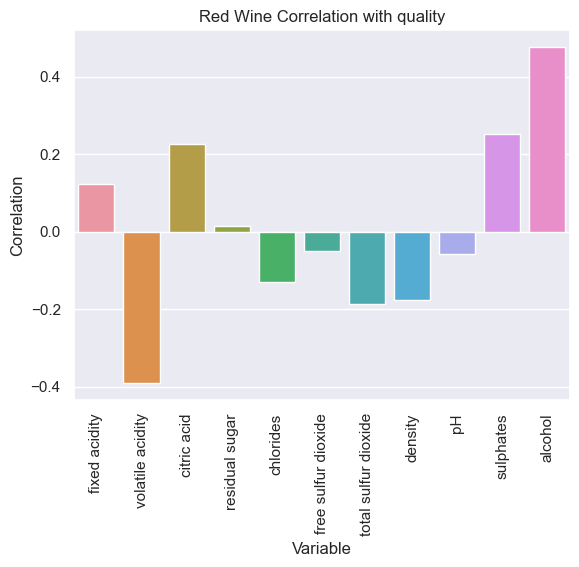

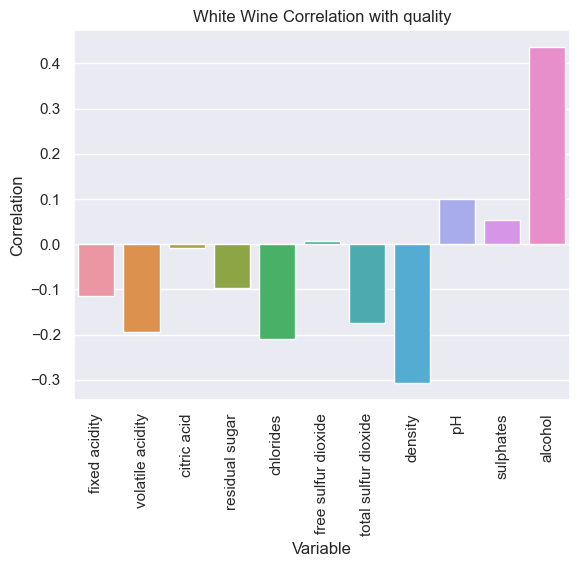

In [159]:
# Task 2:

import matplotlib.pyplot as plt
import seaborn as sns

# Source: https://seaborn.pydata.org/generated/seaborn.barplot.html
# Source: https://jakevdp.github.io/PythonDataScienceHandbook/04.00-introduction-to-matplotlib.html
# Source: https://matplotlib.org/stable/tutorials/introductory/pyplot.html

# Create a correlation matrix for each dataset using the pandas corr() method.
corr_matrix_red = red_wine.corr()
corr_matrix_white = white_wine.corr()

# Extract the correlation between each variable and the quality variable from the correlation matrix.
quality_corr_red = corr_matrix_red["quality"]
quality_corr_white = corr_matrix_white["quality"]

# Plots a bar chart, using the barplot() method from Seaborn, of the correlation between each variable and the quality variable .
sns.barplot(x=quality_corr_red[:-1].index, y=quality_corr_red[:-1].values)
plt.title("Red Wine Correlation with quality")
plt.xlabel("Variable")
plt.ylabel("Correlation")
plt.xticks(rotation=90)
plt.show()

sns.barplot(x=quality_corr_white[:-1].index, y=quality_corr_white[:-1].values)
plt.title("White Wine Correlation with quality")
plt.xlabel("Variable")
plt.ylabel("Correlation")
plt.xticks(rotation=90)
plt.show()


(REWORDDDD THISSSSS quilllll bot###################################################)


The correlation matrix was confusing so preferring using seaborn's barplot to decipher the results instead.
For the above correlation matrix select the variables with the strongest correlation to the target variable and use them to train your machine learning model. So the variables I will be choosing will be based on correlation.

The results:

The code above generates two bar charts that show the correlation between each variable and the quality variable for red and white wines.

For the red wine correlation chart, the variables with the highest positive correlation with quality are alcohol and sulphates, while the variables with the highest negative correlation with quality are sulphates and total sulfur dioxide.

For the white wine correlation chart, the variables with the highest positive correlation with quality are alcohol and pH, while the variables with the highest negative correlation with quality are density and residual sugar.

The correlation value for each variable and quality is shown on the y-axis of each chart, with positive values indicating a positive correlation and negative values indicating a negative correlation. The x-axis shows the different variables in the dataset.

The charts were created using the Seaborn library's 'barplot()' method, with the x and y axes specified as the variables and their respective correlation values. The 'rotation=90' argument was used to rotate the x-axis labels by 90 degrees for better readability.



In [182]:
# Task 3:

# Reducing Quality Labels to Binary Classification

import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix

# Load the data
red_wine = pd.read_csv('winequality-red.csv', delimiter=';')
red_wine['wine_type'] = 'red'

white_wine = pd.read_csv('winequality-white.csv', delimiter=';')
white_wine['wine_type'] = 'white'

# Combine the data
wines = pd.concat([red_wine, white_wine])

# Create a binary target variable based on the quality threshold
wines['quality_binary'] = [1 if x >= 6 else 0 for x in wines['quality']]

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(wines.drop(['quality', 'quality_binary', 'wine_type'], axis=1),
                                                    wines['quality_binary'],
                                                    test_size=0.2,
                                                    random_state=42)

# Train the logistic regression model
model = LogisticRegression(random_state=42)
model.fit(X_train, y_train)

# Predict the test set
y_pred = model.predict(X_test)

# Evaluate the performance of the model
print("Accuracy:", accuracy_score(y_test, y_pred))


Accuracy: 0.7276923076923076


/Users/dayyanmirza/Desktop/CSC2034DataScienceProject/.venv/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [178]:
# Task 3:

import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

# Load the data and combine
wines = pd.concat([pd.read_csv('winequality-red.csv', delimiter=';'), pd.read_csv('winequality-white.csv', delimiter=';')])
wines['quality_binary'] = [1 if x >= 6 else 0 for x in wines['quality']]

# Train and evaluate model for various different thresholds:
for threshold in [6, 5, 7]:
    binary_col_name = f'quality_binary_{threshold}'
    wines[binary_col_name] = [1 if x >= threshold else 0 for x in wines['quality']]
    cols_to_drop = ['quality', 'quality_binary', binary_col_name]
    if 'wine_type' in wines.columns:
        cols_to_drop.append('wine_type')
    X_train, X_test, y_train, y_test = train_test_split(wines.drop(cols_to_drop, axis=1), wines[binary_col_name], test_size=0.2, random_state=42)
    model = LogisticRegression(random_state=42).fit(X_train, y_train)
    print(f"Accuracy (threshold = {threshold}):", accuracy_score(y_test, model.predict(X_test)))



/Users/dayyanmirza/Desktop/CSC2034DataScienceProject/.venv/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/Users/dayyanmirza/Desktop/CSC2034DataScienceProject/.venv/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
 

Accuracy (threshold = 6): 0.7276923076923076
Accuracy (threshold = 5): 0.9623076923076923
Accuracy (threshold = 7): 0.8115384615384615


/Users/dayyanmirza/Desktop/CSC2034DataScienceProject/.venv/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


/Users/dayyanmirza/Desktop/CSC2034DataScienceProject/.venv/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/Users/dayyanmirza/Desktop/CSC2034DataScienceProject/.venv/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
 

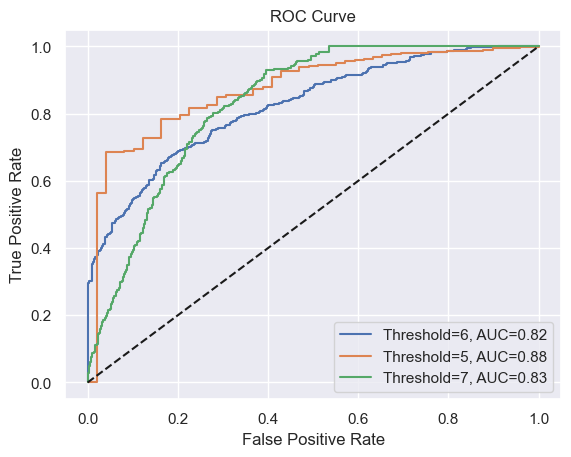

In [179]:
# Task 3:

import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc

# Train and evaluate model for each threshold
for threshold in [6, 5, 7]:
    binary_col_name = f'quality_binary_{threshold}'
    wines[binary_col_name] = [1 if x >= threshold else 0 for x in wines['quality']]
    cols_to_drop = ['quality', 'quality_binary', binary_col_name]
    if 'wine_type' in wines.columns:
        cols_to_drop.append('wine_type')
    X_train, X_test, y_train, y_test = train_test_split(wines.drop(cols_to_drop, axis=1), wines[binary_col_name], test_size=0.2, random_state=42)
    model = LogisticRegression(random_state=42).fit(X_train, y_train)
    y_pred_proba = model.predict_proba(X_test)[:, 1]
    fpr, tpr, _ = roc_curve(y_test, y_pred_proba)
    roc_auc = auc(fpr, tpr)
    plt.plot(fpr, tpr, label=f"Threshold={threshold}, AUC={roc_auc:.2f}")

# Task 4: 

plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc="lower right")
plt.show()


In [185]:
# Task 3: 

import pandas as pd

# Data preparation for regression analysis:

# Load the datasets
red_wine = pd.read_csv('winequality-red.csv', delimiter=';')
white_wine = pd.read_csv('winequality-white.csv', delimiter=';')

# Add a variable to indicate the wine type
red_wine['wine_type'] = 'red'
white_wine['wine_type'] = 'white'

# Combine the datasets into one data frame
wine = pd.concat([red_wine, white_wine], axis=0)
ignore_index=True

# Convert quality column to a categorical variable.
wine['quality'] = pd.Categorical(wine['quality'])

# Explore the data
wine.info()
wine.describe()
wine.isnull().sum()

# Standardize numerical columns excluding "quality"
wine_num = wine.select_dtypes(include=np.number)
wine_num = (wine_num - wine_num.mean()) / wine_num.std()

# Combine standardized numerical columns and categorical column
wine = pd.concat([wine_num, wine['quality']], axis=1)

# Split the data into training and test sets:
from sklearn.model_selection import train_test_split

X = wine.iloc[:, :-1]
y = wine.iloc[:, -1]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)



<class 'pandas.core.frame.DataFrame'>
Int64Index: 6497 entries, 0 to 4897
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype   
---  ------                --------------  -----   
 0   fixed acidity         6497 non-null   float64 
 1   volatile acidity      6497 non-null   float64 
 2   citric acid           6497 non-null   float64 
 3   residual sugar        6497 non-null   float64 
 4   chlorides             6497 non-null   float64 
 5   free sulfur dioxide   6497 non-null   float64 
 6   total sulfur dioxide  6497 non-null   float64 
 7   density               6497 non-null   float64 
 8   pH                    6497 non-null   float64 
 9   sulphates             6497 non-null   float64 
 10  alcohol               6497 non-null   float64 
 11  quality               6497 non-null   category
 12  wine_type             6497 non-null   object  
dtypes: category(1), float64(11), object(1)
memory usage: 666.5+ KB


In [21]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Linear Regression Analysis:

# Fit the linear regression model on the training data
model = LinearRegression()
model.fit(X_train, y_train)

# Make predictions on the test data
y_pred = model.predict(X_test)

# Task 4:

# Evaluate the model's performance
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Mean Squared Error:", mse)
print("R-squared:", r2)


Mean Squared Error: 0.5466964419580581
R-squared: 0.2597673129790167
